In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
from bs4 import BeautifulSoup as BSoup
import requests
import pandas as pd

In [2]:
r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_i_reportModelXsl=133685270')
soup = BSoup(r.text.encode('utf-8'),'lxml')
links = soup.find_all("select")

# The following code stores the values which are going to 
#be used in request.get for data

value_years = {} # Initilizing the datas
years = []
value_semesters = {}
semester = []
value_typeSemester = {}
value_typeSemester["Semestre d'automne"] = []
value_typeSemester['Semestre de printemps'] = []
b = []
typeSemester = []
typeSemester.append("Semestre d'automne")
typeSemester.append('Semestre de printemps')

for i in range(2007,2017):
    value_years[str(i)] = []
    years.append(str(i))
for i in range(1,7):
    value_semesters['Bachelor semestre '+str(i)] = []
    semester.append('Bachelor semestre '+str(i))
value_semesters['Bachelor semestre '+str(5)+'b'] = []
value_semesters['Bachelor semestre '+str(6)+'b'] = []
semester.append('Bachelor semestre '+str(5)+'b')
semester.append('Bachelor semestre '+str(6)+'b')

for link in links:                     
    namesAll = link.find_all("option")
    for names in namesAll:
        #print(names.contents)
        if names.contents:
            if names.contents[0][:4] in years: # stores the values for years
                value_years[str(names.contents[0][:4])] = int(names['value'])
                print(names,names['value'],names.contents[0])
            elif names.contents[0] == 'Informatique': # stores the value for field Informatique
                value_informatiq = int(names['value'])
                print(names,names['value'],names.contents[0]) 
            elif names.contents[0] in semester: # stores the values for semesters
                value_semesters[names.contents[0]] = int(names['value'])
                print(names,names['value'],names.contents[0]) 
            elif names.contents[0] in typeSemester: # stores the values for type of semesters
                value_typeSemester[names.contents[0]] = int(names['value'])
                print(names,names['value'],names.contents[0]) 

<option value="249847">Informatique</option> 249847 Informatique
<option value="355925344">2016-2017</option> 355925344 2016-2017
<option value="213638028">2015-2016</option> 213638028 2015-2016
<option value="213637922">2014-2015</option> 213637922 2014-2015
<option value="213637754">2013-2014</option> 213637754 2013-2014
<option value="123456101">2012-2013</option> 123456101 2012-2013
<option value="123455150">2011-2012</option> 123455150 2011-2012
<option value="39486325">2010-2011</option> 39486325 2010-2011
<option value="978195">2009-2010</option> 978195 2009-2010
<option value="978187">2008-2009</option> 978187 2008-2009
<option value="978181">2007-2008</option> 978181 2007-2008
<option value="249108">Bachelor semestre 1</option> 249108 Bachelor semestre 1
<option value="249114">Bachelor semestre 2</option> 249114 Bachelor semestre 2
<option value="942155">Bachelor semestre 3</option> 942155 Bachelor semestre 3
<option value="942163">Bachelor semestre 4</option> 942163 Bachelor 

In [3]:
query = {'ww_x_UNITE_ACAD' : str(value_informatiq),'ww_x_PERIODE_ACAD':str(value_years['2015']),
        'ww_x_PERIODE_PEDAGO':str(value_semesters['Bachelor semestre 4']),
         'ww_x_HIVERETE':str(value_typeSemester[typeSemester[1]])}
#print(r.url)

In [79]:
#print(soup.prettify)
def get_data(query):
    r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.bhtml?ww_x_GPS=-1&ww_i_reportmodel=133685247&ww_i_reportModelXsl=133685270',params=query)
    soup = BSoup(r.text.encode('utf-8'),'lxml')
    dataSheet = {}
    dataSheet['name'] = []
    dataSheet['gender'] = []
    dataSheet['sciper'] = []
    dataSheet['status'] = []
    content = soup.find_all("tr")
    flag_init = 0
    j = 1
    for n in content:
        n1 = n.find_all("th")
        for n2 in n:
            #print(n2.text,'--')
            if n2.text == "No Sciper":
                flag_init = 1
                continue
            if flag_init == 1:
                if j % 12 == 1:
                    dataSheet['gender'].append(n2.text)
                    #print(n2.text)
                elif j % 12 == 2:
                    dataSheet['name'].append(n2.text)
                    #print(n2.text)
                elif j % 12 == 8:
                    dataSheet['status'].append(n2.text)
                    #print(n2.text)
                elif j % 12 == 11:
                    #print(n2.text)
                    dataSheet['sciper'].append(n2.text)
                j += 1
    length = np.zeros(4)
    length[0] = len(dataSheet['name'])
    length[1] = len(dataSheet['gender'])
    length[2] = len(dataSheet['sciper'])
    length[3] = len(dataSheet['status'])
    min_length = int(min(length))
    dataSheet['name'] = dataSheet['name'][:min_length]
    dataSheet['gender'] = dataSheet['gender'][:min_length]
    dataSheet['status'] = dataSheet['status'][:min_length]
    dataSheet['sciper'] = dataSheet['sciper'][:min_length]
    data_recieved = pd.DataFrame(dataSheet)
    return data_recieved

In [80]:
query = {'ww_x_UNITE_ACAD' : str(value_field[field_name[1]]),'ww_x_PERIODE_ACAD':str(value_years[str(2010)]),
           'ww_x_PERIODE_PEDAGO':str(value_semesters[semester[6]]),
         'ww_x_HIVERETE':str(value_typeSemester[typeSemester[0]])}
r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.bhtml?ww_x_GPS=-1&ww_i_reportmodel=133685247&ww_i_reportModelXsl=133685270',params=query)
soup = BSoup(r.text.encode('utf-8'),'lxml')
dataSheet = {}
dataSheet['name'] = []
dataSheet['gender'] = []
dataSheet['sciper'] = []
dataSheet['status'] = []
content = soup.find_all("tr")
flag_init = 0
j = 1
for n in content:
        n1 = n.find_all("th")
        for n2 in n:
            #print(n2.text,'--')
            if n2.text == "No Sciper":
                flag_init = 1
                continue
            if flag_init == 1:
                if j % 12 == 1:
                    dataSheet['gender'].append(n2.text)
                    #print(n2.text)
                elif j % 12 == 2:
                    dataSheet['name'].append(n2.text)
                    #print(n2.text)
                elif j % 12 == 8:
                    dataSheet['status'].append(n2.text)
                    #print(n2.text)
                elif j % 12 == 11:
                    #print(n2.text)
                    dataSheet['sciper'].append(n2.text)
                j+=1
dataSheet
len(dataSheet)
#data_recieved = pd.DataFrame(dataSheet)
data_recieved = get_data(query)

In [5]:
query = {'ww_x_UNITE_ACAD' : str(value_informatiq),'ww_x_PERIODE_ACAD':str(value_years['2015']),
        'ww_x_PERIODE_PEDAGO':str(value_semesters['Bachelor semestre 4']),
         'ww_x_HIVERETE':str(value_typeSemester[typeSemester[1]])}
da1 = get_data(query)
#da1 = pd.DataFrame(data)
da1['year'] = 2015
query = {'ww_x_UNITE_ACAD' : str(value_informatiq),'ww_x_PERIODE_ACAD':str(value_years['2015']),
        'ww_x_PERIODE_PEDAGO':str(value_semesters['Bachelor semestre 6']),
         'ww_x_HIVERETE':str(value_typeSemester[typeSemester[1]])}
da2 = get_data(query)
#da2 = pd.DataFrame(data)
da2['year'] = 2016
da3 = pd.concat([da2,da1])

In [6]:
data = pd.DataFrame({'gender':[],'name':[],'status':[],'sciper':[],'gender':[],'year':[]
                     ,'semester':[],'type semester':[]})
for y in range(2007,2017): # concatenating whole data into a pandas dataframe
    for vS in semester:
        for tS in typeSemester:
            query = {'ww_x_UNITE_ACAD' : str(value_informatiq),'ww_x_PERIODE_ACAD':str(value_years[str(y)]),
        'ww_x_PERIODE_PEDAGO':str(value_semesters[vS]),
         'ww_x_HIVERETE':str(value_typeSemester[tS])}
            data_recieved = get_data(query)
            data_recieved['year'] = y
            data_recieved['semester'] = vS
            data_recieved['type semester'] = tS
            data = pd.concat([data,data_recieved])
data.head()

,gender,name,sciper,semester,status,type semester,year
0,Monsieur,ArÃ©valo Christian,169569,Bachelor semestre 1,PrÃ©sent,Semestre d'automne,2007.0
1,Monsieur,Aubelle Flavien,174905,Bachelor semestre 1,PrÃ©sent,Semestre d'automne,2007.0
2,Monsieur,Badoud Morgan,173922,Bachelor semestre 1,PrÃ©sent,Semestre d'automne,2007.0
3,Monsieur,Baeriswyl Jonathan,179406,Bachelor semestre 1,PrÃ©sent,Semestre d'automne,2007.0
4,Monsieur,Barroco Michael,179428,Bachelor semestre 1,PrÃ©sent,Semestre d'automne,2007.0


In [7]:
# remove exchange students as they might not study their whole Bachelore at EPFL
data2= data.drop(data['sciper']=='Ecole Echange') # about 119 entreis removed

In [8]:
# get the unique sciper of students
unique_scipers = pd.Series.unique(data2['sciper'])

In [9]:
len(data)-len(data2)

119

In [10]:
# students who reach term 6
term6_reached_sciper = pd.Series.unique(data2.loc[data2['semester'] == 'Bachelor semestre 6']['sciper'])
# students who begin term 1
term1_reached_sciper = pd.Series.unique(data2.loc[data2['semester'] == 'Bachelor semestre 1']['sciper'])

In [11]:
# students who exist both in se,ester 1 and 6
# The number of these students is 387
finished = np.intersect1d(term6_reached_sciper,term1_reached_sciper)

In [12]:
Male = []
Female = []
for i in range(len(finished)): # counting the number of semesters for students
    count = data2.loc[data2['sciper']==finished[i]].count()[0]
    gen = data2.loc[data2['sciper']==finished[i]]['gender']
    if gen.iloc[0] == 'Monsieur':
        Male.append(count)
    else:
        Female.append(count)
#    print(gen.iloc[0])


As it is seen in the following cell, the average time it takes for **boys** to finish Bachelor is 
**7.084** and for **girls** it is **6.79**.
There is also one boy who has finished bacheore in less than 6 semesters we keep that as he might take more courses than usual and finish bachelore quickly.

In [13]:
np.mean(Male) # average number of semesters for boys

7.0837988826815641

In [14]:
np.mean(Female) # average number of semesters for girls

6.7931034482758621

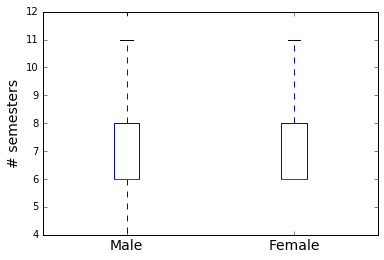

In [15]:
plt.boxplot([Male,Female])
plt.xticks([1, 2], ['Male', 'Female'],fontsize=14)
plt.ylabel('# semesters',fontsize=14)

As it is seen there is no significant difference between the two genders and they are almost same

# Task 2

In [16]:
# Here we want to find all the fields of study and theire value which is going 
#to be used in request.get
r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_i_reportModelXsl=133685270')
soup = BSoup(r.text.encode('utf-8'),'lxml') # passing the html to Bsoup
names = soup.find('select', attrs={'name': 'ww_x_UNITE_ACAD'}) # finding the place relates to the name of fields
field_name = []
value_field = {}
for n in names:
    if len(n)!=0:
        field_name.append(n.contents[0])
        value_field[n.contents[0]] = int(n['value'])

In [22]:
r = requests.get('http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_i_reportModelXsl=133685270')
soup = BSoup(r.text.encode('utf-8'),'lxml')
links = soup.find_all("select")

# The following code stores the values which are going to 
#be used in request.get for data

value_years = {} # Initilizing the datas
years = []
value_semesters = {}
semester = []
value_typeSemester = {}
value_typeSemester["Semestre d'automne"] = []
value_typeSemester['Semestre de printemps'] = []
typeSemester = []
typeSemester.append("Semestre d'automne")
typeSemester.append('Semestre de printemps')

for i in range(2007,2017):
    value_years[str(i)] = []
    years.append(str(i))
for i in range(1,5):
    value_semesters['Master semestre '+str(i)] = []
    semester.append('Master semestre '+str(i))
value_semesters['Mineur semestre 1'] = []
value_semesters['Mineur semestre 2'] = []
value_semesters['Projet Master automne'] = []
value_semesters['Projet Master printemps'] = []
value_semesters['Stage printemps master'] = []
semester.append('Mineur semestre 1')
semester.append('Mineur semestre 2')
semester.append('Projet Master automne')
semester.append('Projet Master printemps')
semester.append('Stage printemps master')

for link in links:                     
    namesAll = link.find_all("option")
    for names in namesAll:
        #print(names.contents)
        if names.contents:
            if names.contents[0][:4] in years: # stores the values for years
                value_years[str(names.contents[0][:4])] = int(names['value'])
                print(names,names['value'],names.contents[0]) 
            elif names.contents[0] in semester: # stores the values for semesters
                value_semesters[names.contents[0]] = int(names['value'])
                print(names,names['value'],names.contents[0]) 
            elif names.contents[0] in typeSemester: # stores the values for type of semesters
                value_typeSemester[names.contents[0]] = int(names['value'])
                print(names,names['value'],names.contents[0]) 

<option value="355925344">2016-2017</option> 355925344 2016-2017
<option value="213638028">2015-2016</option> 213638028 2015-2016
<option value="213637922">2014-2015</option> 213637922 2014-2015
<option value="213637754">2013-2014</option> 213637754 2013-2014
<option value="123456101">2012-2013</option> 123456101 2012-2013
<option value="123455150">2011-2012</option> 123455150 2011-2012
<option value="39486325">2010-2011</option> 39486325 2010-2011
<option value="978195">2009-2010</option> 978195 2009-2010
<option value="978187">2008-2009</option> 978187 2008-2009
<option value="978181">2007-2008</option> 978181 2007-2008
<option value="2230106">Master semestre 1</option> 2230106 Master semestre 1
<option value="942192">Master semestre 2</option> 942192 Master semestre 2
<option value="2230128">Master semestre 3</option> 2230128 Master semestre 3
<option value="2230140">Master semestre 4</option> 2230140 Master semestre 4
<option value="2335667">Mineur semestre 1</option> 2335667 Mineu

In [82]:
# In this cell we want to import whole data into a pandas dataframe
# where we pass the paramters found in the previouse cell
data = pd.DataFrame({'field':[],'gender':[],'name':[],'status':[],'sciper':[],'gender':[]
                     ,'year':[],'semester':[],'type semester':[]})
for field in [field_name[1]]:
    for y in years: # concatenating whole data into a pandas dataframe
        for vS in semester:
            for tS in typeSemester:
                #print(field,y,vS,tS)
                query = {'ww_x_UNITE_ACAD' : str(value_field[field]),'ww_x_PERIODE_ACAD':str(value_years[str(y)]),
            'ww_x_PERIODE_PEDAGO':str(value_semesters[vS]),
             'ww_x_HIVERETE':str(value_typeSemester[tS])}
                data_recieved = get_data(query)
                data_recieved['field'] = field
                data_recieved['year'] = y
                data_recieved['semester'] = vS
                data_recieved['type semester'] = tS     
                data = pd.concat([data,data_recieved])
data.head()

,field,gender,name,sciper,semester,status,type semester,year
0,Chimie et gÃ©nie chimique,Madame,Borcard FranÃ§oise,180368,Master semestre 1,PrÃ©sent,Semestre d'automne,2007
1,Chimie et gÃ©nie chimique,Monsieur,Cornuz Maurin,166600,Master semestre 1,PrÃ©sent,Semestre d'automne,2007
2,Chimie et gÃ©nie chimique,Monsieur,Curchod Basile,167367,Master semestre 1,PrÃ©sent,Semestre d'automne,2007
3,Chimie et gÃ©nie chimique,Madame,Ding Laura,161128,Master semestre 1,PrÃ©sent,Semestre d'automne,2007
4,Chimie et gÃ©nie chimique,Monsieur,Dubois Maxime,166755,Master semestre 1,PrÃ©sent,Semestre d'automne,2007


In [33]:
field_name[1]

'Chimie et gÃ©nie chimique'

In [38]:
semester

['Master semestre 1',
 'Master semestre 2',
 'Master semestre 3',
 'Master semestre 4',
 'Mineur semestre 1',
 'Mineur semestre 2',
 'Projet Master automne',
 'Projet Master printemps',
 'Stage printemps master']